# [Machine Learning] K-Means Clustering


### Student ID : 20144367, Name : Lee, Donghyun


## 1. Problem

1. Apply K-means clustering to MNIST training dataset with different K = 5, 10, 15, 20 and present the following results for each K.
2. Visualize K centroid images for each category.
3. Plot the training energy per optimization iteration.
4. Plot the training accuracy per optimization iteration.
5. Plot the testing accuracy per optimization iteration.

## 2. Definition

### 2.1. K-Means Clustering

> k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

> Given a set of observations ${(x_1,x_2, \dots, x_n)}$, where each observation is a $d$-dmensional real vcector, k-means clustering aim to partition the $n$ obseravations into $k( \leq n)$ sets $C={\{C_1, C_2,\dots,C_k\}}$ so as to minimize the within-cluster sum of squares $(WCSS)$. Formally, the oct is to find : 
$$arg\;min \sum_{i=1}^k \sum_{x \in C_i} {\Vert x - \mu_i \Vert}^2 $$
where $\mu_i$ is the mean of points in $C$.

### 2.2. Energy Function and Accuracy

#### [Energy Function]

> $ \sum_{k = 1}^K \| x_i - c_{k_i} \|^2 $
where $k_i$ denotes the category of $x_i$, and $c_{k_i}$ denotes the centroid of category $x_i$.

#### [Accuracy]

> $ \frac{\sum_{k = 1}^K m_k}{N} $
where $N$ denotes the total number of data, and $m_k$ denotes the number of data with majority for category $k$.

### Testing Accuracy

For testing accuracy, use the centroid calculated by training set. 


### [1] K = 5
#### (1) Calculate Energy and Accuracy using 'mnist_train.csv' as training set

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import random

#
# File I/O
#
file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

#
# Variables Definition
#
size_row	= 28                # height of the image
size_col  	= 28                # width of the image
num_image	= len(data)         # number of images in the file
count   	= 0                 # count for the number of images
k = 5                           # number of cluster
maximum_round = 50              # maximum number of round for learning
threshold = 0.0001

num_iteration = 0               # Number of iterations executed
prev_energy = 0                 # variable for saving previous round's energy
current_energy = 0              # variable for saving current round's energy
energy_for_each_round = []      # energy for each round
accuracy_for_each_round = []    # accuracy for each round


#
# Function L2Distance(listX, listY) : L2 Norm distance between list x and y
#
def L2Distance(listX, listY):

    x = np.array(listX)
    y = np.array(listY)

    sqrSumList = (x - y) ** 2    # Square of (x-y) for each element in list x, y
    sqrSum = np.sum(sqrSumList)  # Get L2 distance using square sum list  
    result = np.sqrt(sqrSum)     # get the square of L2 distance using np.sqrt()
    return(result)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)
cluster_num = np.empty(num_image,dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    
    list_label[count]       = label
    list_image[:, count]    = im_vector 
    # Randomly labeling on each picture between 0 to k - 1
    cluster_num[count]     = random.randrange(0,k)

    count += 1

# If the iteration exceed maximum round, stop
for n in range(0, maximum_round) :
    
    print("<",n+1, "th round>")
    centroid_vector = np.zeros(((size_row * size_col),k), dtype=float)
    cv_count = np.zeros(k, dtype = int)
    
    # compute the sum of color and the number of images for each pixel 
    for i in range(0,num_image) :
        centroid_vector[:, int(cluster_num[i])] += list_image[:, i]
        cv_count[int(cluster_num[i])] += 1
    
    # update the next round's centroid using average value
    for i in range(0,k) :
        centroid_vector[:, i] /= cv_count[i]
    
    for i in range(0,num_image) :
        im_vector = list_image[:, i]
        L2Dist = np.zeros(k, dtype = float)
        
        for j in range(0, k) :
            L2Dist[j] = L2Distance(im_vector, centroid_vector[:,j])
        
        # label of the closest distance would be the label of i-th image
        modified_cluster_num = np.argmin(L2Dist)
        current_energy += L2Distance(im_vector, centroid_vector[:, modified_cluster_num]) ** 2
        cluster_num[i] = modified_cluster_num
    
    energy_for_each_round.append(current_energy)
    
    accuracy_matrix = np.zeros((k,10), dtype = int)
    list_mk = np.zeros(k)
    
    for i in range(0,num_image) :
        accuracy_matrix[int(cluster_num[i]),int(list_label[i])] += 1
    
    for i in range(0,k) :
        list_mk[i] = np.amax(accuracy_matrix[i])

    accuracy = np.sum(list_mk) / num_image
    accuracy_for_each_round.append(accuracy)

    print("# of elements in each cluster : ", cv_count)
    print("change rate : ", round(np.absolute(current_energy - prev_energy) / current_energy * 100, 3), "%")
    
    
    if np.absolute(current_energy - prev_energy) / current_energy < threshold :
        num_iteration = n
        break
        
    prev_energy = current_energy
    current_energy = 0
    num_iteration = n
    
print("# of iteration : ", num_iteration)
    


< 1 th round>
# of elements in each cluster :  [12015 12009 12106 11879 11991]
change rate :  100.0 %
< 2 th round>
# of elements in each cluster :  [15028 13611 16731  7940  6690]
change rate :  14.002 %
< 3 th round>
# of elements in each cluster :  [13842 13189 14094  9497  9378]
change rate :  1.796 %
< 4 th round>
# of elements in each cluster :  [13101 12467 12785 10513 11134]
change rate :  0.767 %
< 5 th round>
# of elements in each cluster :  [12870 11684 11935 10891 12620]
change rate :  0.35 %
< 6 th round>
# of elements in each cluster :  [12777 11075 11470 10965 13713]
change rate :  0.224 %
< 7 th round>
# of elements in each cluster :  [12961 10687 11116 10845 14391]
change rate :  0.222 %
< 8 th round>
# of elements in each cluster :  [13289 10572 10765 10653 14721]
change rate :  0.244 %
< 9 th round>
# of elements in each cluster :  [13534 10686 10455 10492 14833]
change rate :  0.143 %
< 10 th round>
# of elements in each cluster :  [13613 10920 10199 10451 14817]
ch

#### (1)_2 Plot the Energy Graph and Accuracy Graph

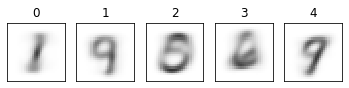

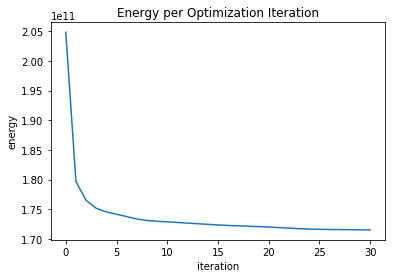

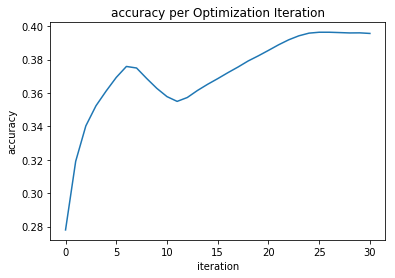

In [33]:
for i in range(k) : 
    
    label       = i
    im_vector   = centroid_vector[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))
    
    plt.subplot(1, k, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None', vmin = 0, vmax = 255)

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()

# plot Energy Graph
plt.xlabel('iteration')
plt.ylabel('energy')
plt.title('Energy per Optimization Iteration')
plt.plot(energy_for_each_round)
plt.show()

# plot Accuracy Graph
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy per Optimization Iteration')
plt.plot(accuracy_for_each_round)
plt.show()

#### (2) Calculate testing accuracy using centroid vectors calculated above using training set

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import random

#
# File I/O
#
file_data		= "mnist_test.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

#
# Variables Definition
#
size_row	= 28                # height of the image
size_col  	= 28                # width of the image
num_image	= len(data)         # number of images in the file
count   	= 0                 # count for the number of images
k = 5                           # number of cluster
maximum_round = 50              # maximum number of round for learning
threshold = 0.0001

num_iteration = 0               # Number of iterations executed
prev_energy = 0                 # variable for saving previous round's energy
current_energy = 0              # variable for saving current round's energy
energy_for_each_round = []      # energy for each round
accuracy_for_each_round = []    # accuracy for each round


#
# Function L2Distance(listX, listY) : L2 Norm distance between list x and y
#
def L2Distance(listX, listY):

    x = np.array(listX)
    y = np.array(listY)

    sqrSumList = (x - y) ** 2    # Square of (x-y) for each element in list x, y
    sqrSum = np.sum(sqrSumList)  # Get L2 distance using square sum list  
    result = np.sqrt(sqrSum)     # get the square of L2 distance using np.sqrt()
    return(result)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)
#cluster_num = np.empty(num_image,dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    
    list_label[count]       = label
    list_image[:, count]    = im_vector 
    # Randomly labeling on each picture between 0 to k - 1
    # cluster_num[count]     = random.randrange(0,k)

    count += 1

# If the iteration exceed maximum round, stop
for n in range(0, maximum_round) :
    
    print("<",n+1, "th round>")
    centroid_vector = np.zeros(((size_row * size_col),k), dtype=float)
    cv_count = np.zeros(k, dtype = int)
    
    # compute the sum of color and the number of images for each pixel 
    for i in range(0,num_image) :
        centroid_vector[:, int(cluster_num[i])] += list_image[:, i]
        cv_count[int(cluster_num[i])] += 1
    
    # update the next round's centroid using average value
    for i in range(0,k) :
        centroid_vector[:, i] /= cv_count[i]
    
    for i in range(0,num_image) :
        im_vector = list_image[:, i]
        L2Dist = np.zeros(k, dtype = float)
        
        for j in range(0, k) :
            L2Dist[j] = L2Distance(im_vector, centroid_vector[:,j])
        
        # label of the closest distance would be the label of i-th image
        modified_cluster_num = np.argmin(L2Dist)
        current_energy += L2Distance(im_vector, centroid_vector[:, modified_cluster_num]) ** 2
        cluster_num[i] = modified_cluster_num
    
    energy_for_each_round.append(current_energy)
    
    accuracy_matrix = np.zeros((k,10), dtype = int)
    list_mk = np.zeros(k)
    
    for i in range(0,num_image) :
        accuracy_matrix[int(cluster_num[i]),int(list_label[i])] += 1
    
    for i in range(0,k) :
        list_mk[i] = np.amax(accuracy_matrix[i])

    accuracy = np.sum(list_mk) / num_image
    accuracy_for_each_round.append(accuracy)

    print("# of elements in each cluster : ", cv_count)
    print("change rate : ", round(np.absolute(current_energy - prev_energy) / current_energy * 100, 3), "%")
    
    
    if np.absolute(current_energy - prev_energy) / current_energy < threshold :
        num_iteration = n
        break
        
    prev_energy = current_energy
    current_energy = 0
    num_iteration = n
    
print("# of iteration : ", num_iteration)
    


< 1 th round>
# of elements in each cluster :  [2374 1750 2068 1757 2051]
change rate :  100.0 %
< 2 th round>
# of elements in each cluster :  [1968 2780 1428 1897 1927]
change rate :  13.431 %
< 3 th round>
# of elements in each cluster :  [1864 2857 1796 1785 1698]
change rate :  1.534 %
< 4 th round>
# of elements in each cluster :  [1825 2878 1869 1752 1676]
change rate :  1.022 %
< 5 th round>
# of elements in each cluster :  [1818 2886 1906 1708 1682]
change rate :  1.281 %
< 6 th round>
# of elements in each cluster :  [1830 2661 1968 1860 1681]
change rate :  0.769 %
< 7 th round>
# of elements in each cluster :  [1879 2476 2008 1999 1638]
change rate :  0.48 %
< 8 th round>
# of elements in each cluster :  [1944 2343 2038 2070 1605]
change rate :  0.27 %
< 9 th round>
# of elements in each cluster :  [2000 2286 2061 2071 1582]
change rate :  0.136 %
< 10 th round>
# of elements in each cluster :  [2047 2241 2059 2054 1599]
change rate :  0.062 %
< 11 th round>
# of elements i

#### (2)_2 Plot Accuracy Graph for Training set

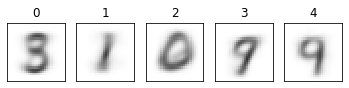

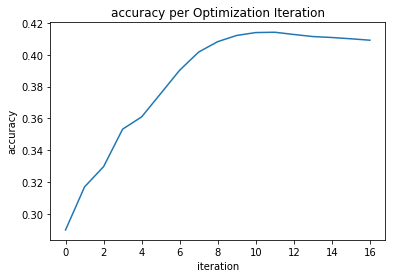

In [35]:
for i in range(k) : 
    
    label       = i
    im_vector   = centroid_vector[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))
    
    plt.subplot(1, k, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None', vmin = 0, vmax = 255)

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()

# plot Accuracy Graph
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy per Optimization Iteration')
plt.plot(accuracy_for_each_round)
plt.show()

### [2] K = 10
#### (1) Calculate Energy and Accuracy using 'mnist_train.csv' as training set

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import random

#
# File I/O
#
file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

#
# Variables Definition
#
size_row	= 28                # height of the image
size_col  	= 28                # width of the image
num_image	= len(data)         # number of images in the file
count   	= 0                 # count for the number of images
k = 10                          # number of cluster
maximum_round = 50              # maximum number of round for learning
threshold = 0.0001

num_iteration = 0               # Number of iterations executed
prev_energy = 0                 # variable for saving previous round's energy
current_energy = 0              # variable for saving current round's energy
energy_for_each_round = []      # energy for each round
accuracy_for_each_round = []    # accuracy for each round


#
# Function L2Distance(listX, listY) : L2 Norm distance between list x and y
#
def L2Distance(listX, listY):

    x = np.array(listX)
    y = np.array(listY)

    sqrSumList = (x - y) ** 2    # Square of (x-y) for each element in list x, y
    sqrSum = np.sum(sqrSumList)  # Get L2 distance using square sum list  
    result = np.sqrt(sqrSum)     # get the square of L2 distance using np.sqrt()
    return(result)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)
cluster_num = np.empty(num_image,dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    
    list_label[count]       = label
    list_image[:, count]    = im_vector 
    # Randomly labeling on each picture between 0 to k - 1
    cluster_num[count]     = random.randrange(0,k)

    count += 1

# If the iteration exceed maximum round, stop
for n in range(0, maximum_round) :
    
    print("<",n+1, "th round>")
    centroid_vector = np.zeros(((size_row * size_col),k), dtype=float)
    cv_count = np.zeros(k, dtype = int)
    
    # compute the sum of color and the number of images for each pixel 
    for i in range(0,num_image) :
        centroid_vector[:, int(cluster_num[i])] += list_image[:, i]
        cv_count[int(cluster_num[i])] += 1
    
    # update the next round's centroid using average value
    for i in range(0,k) :
        centroid_vector[:, i] /= cv_count[i]
    
    for i in range(0,num_image) :
        im_vector = list_image[:, i]
        L2Dist = np.zeros(k, dtype = float)
        
        for j in range(0, k) :
            L2Dist[j] = L2Distance(im_vector, centroid_vector[:,j])
        
        # label of the closest distance would be the label of i-th image
        modified_cluster_num = np.argmin(L2Dist)
        current_energy += L2Distance(im_vector, centroid_vector[:, modified_cluster_num]) ** 2
        cluster_num[i] = modified_cluster_num
    
    energy_for_each_round.append(current_energy)
    
    accuracy_matrix = np.zeros((k,10), dtype = int)
    list_mk = np.zeros(k)
    
    for i in range(0,num_image) :
        accuracy_matrix[int(cluster_num[i]),int(list_label[i])] += 1
    
    for i in range(0,k) :
        list_mk[i] = np.amax(accuracy_matrix[i])

    accuracy = np.sum(list_mk) / num_image
    accuracy_for_each_round.append(accuracy)

    print("# of elements in each cluster : ", cv_count)
    print("change rate : ", round(np.absolute(current_energy - prev_energy) / current_energy * 100, 3), "%")
    
    
    if np.absolute(current_energy - prev_energy) / current_energy < threshold :
        num_iteration = n
        break
        
    prev_energy = current_energy
    current_energy = 0
    num_iteration = n
    
print("# of iteration : ", num_iteration)
    


< 1 th round>
# of elements in each cluster :  [5959 6004 5910 6060 6009 6068 6013 5956 6056 5965]
change rate :  100.0 %
< 2 th round>
# of elements in each cluster :  [ 3269  1598  1144 10354  8873 13952  5409  7722  3542  4137]
change rate :  20.097 %
< 3 th round>
# of elements in each cluster :  [ 6747  4260  3367  6809  6860 11906  5050  5407  4579  5015]
change rate :  4.845 %
< 4 th round>
# of elements in each cluster :  [ 7837  4955  4816  6485  5647 10178  4865  5187  4568  5462]
change rate :  1.808 %
< 5 th round>
# of elements in each cluster :  [7970 5226 5934 6530 4988 8893 4812 5310 4779 5558]
change rate :  0.899 %
< 6 th round>
# of elements in each cluster :  [7788 5508 6610 6616 4749 8000 4757 5478 4928 5566]
change rate :  0.71 %
< 7 th round>
# of elements in each cluster :  [7639 5907 6849 6754 4655 7310 4675 5738 4928 5545]
change rate :  0.668 %
< 8 th round>
# of elements in each cluster :  [7681 6318 6784 6931 4616 6727 4633 5929 4890 5491]
change rate :  0.

#### (1)_2 Plot the Energy Graph and Accuracy Graph

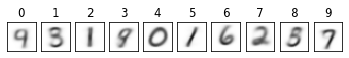

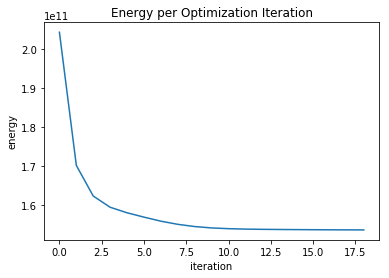

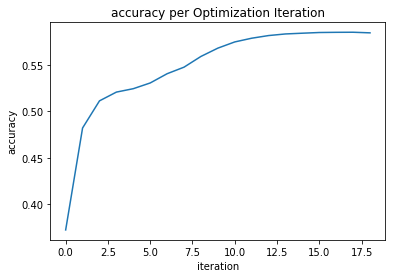

In [38]:
for i in range(k) : 
    
    label       = i
    im_vector   = centroid_vector[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))
    
    plt.subplot(1, k, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None', vmin = 0, vmax = 255)

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()

# plot Energy Graph
plt.xlabel('iteration')
plt.ylabel('energy')
plt.title('Energy per Optimization Iteration')
plt.plot(energy_for_each_round)
plt.show()

# plot Accuracy Graph
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy per Optimization Iteration')
plt.plot(accuracy_for_each_round)
plt.show()

#### (2) Calculate testing accuracy using centroid vectors calculated above using training set

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import random

#
# File I/O
#
file_data		= "mnist_test.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

#
# Variables Definition
#
size_row	= 28                # height of the image
size_col  	= 28                # width of the image
num_image	= len(data)         # number of images in the file
count   	= 0                 # count for the number of images
k = 10                           # number of cluster
maximum_round = 50              # maximum number of round for learning
threshold = 0.0001

num_iteration = 0               # Number of iterations executed
prev_energy = 0                 # variable for saving previous round's energy
current_energy = 0              # variable for saving current round's energy
energy_for_each_round = []      # energy for each round
accuracy_for_each_round = []    # accuracy for each round


#
# Function L2Distance(listX, listY) : L2 Norm distance between list x and y
#
def L2Distance(listX, listY):

    x = np.array(listX)
    y = np.array(listY)

    sqrSumList = (x - y) ** 2    # Square of (x-y) for each element in list x, y
    sqrSum = np.sum(sqrSumList)  # Get L2 distance using square sum list  
    result = np.sqrt(sqrSum)     # get the square of L2 distance using np.sqrt()
    return(result)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)
#cluster_num = np.empty(num_image,dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    
    list_label[count]       = label
    list_image[:, count]    = im_vector 
    # Randomly labeling on each picture between 0 to k - 1
    # cluster_num[count]     = random.randrange(0,k)

    count += 1

# If the iteration exceed maximum round, stop
for n in range(0, maximum_round) :
    
    print("<",n+1, "th round>")
    centroid_vector = np.zeros(((size_row * size_col),k), dtype=float)
    cv_count = np.zeros(k, dtype = int)
    
    # compute the sum of color and the number of images for each pixel 
    for i in range(0,num_image) :
        centroid_vector[:, int(cluster_num[i])] += list_image[:, i]
        cv_count[int(cluster_num[i])] += 1
    
    # update the next round's centroid using average value
    for i in range(0,k) :
        centroid_vector[:, i] /= cv_count[i]
    
    for i in range(0,num_image) :
        im_vector = list_image[:, i]
        L2Dist = np.zeros(k, dtype = float)
        
        for j in range(0, k) :
            L2Dist[j] = L2Distance(im_vector, centroid_vector[:,j])
        
        # label of the closest distance would be the label of i-th image
        modified_cluster_num = np.argmin(L2Dist)
        current_energy += L2Distance(im_vector, centroid_vector[:, modified_cluster_num]) ** 2
        cluster_num[i] = modified_cluster_num
    
    energy_for_each_round.append(current_energy)
    
    accuracy_matrix = np.zeros((k,10), dtype = int)
    list_mk = np.zeros(k)
    
    for i in range(0,num_image) :
        accuracy_matrix[int(cluster_num[i]),int(list_label[i])] += 1
    
    for i in range(0,k) :
        list_mk[i] = np.amax(accuracy_matrix[i])

    accuracy = np.sum(list_mk) / num_image
    accuracy_for_each_round.append(accuracy)

    print("# of elements in each cluster : ", cv_count)
    print("change rate : ", round(np.absolute(current_energy - prev_energy) / current_energy * 100, 3), "%")
    
    
    if np.absolute(current_energy - prev_energy) / current_energy < threshold :
        num_iteration = n
        break
        
    prev_energy = current_energy
    current_energy = 0
    num_iteration = n
    
print("# of iteration : ", num_iteration)
    


< 1 th round>
# of elements in each cluster :  [1331 1059  976 1336  791  815  939  781  989  983]
change rate :  100.0 %
< 2 th round>
# of elements in each cluster :  [ 398  956 1801 1429  769  196  813  466 1843 1329]
change rate :  21.91 %
< 3 th round>
# of elements in each cluster :  [ 616  997 1318 1175  738  578 1213  747 1526 1092]
change rate :  5.248 %
< 4 th round>
# of elements in each cluster :  [ 828  976 1310 1001  614  768 1182  874 1346 1101]
change rate :  1.606 %
< 5 th round>
# of elements in each cluster :  [ 952  949 1286  928  576  862 1154  940 1277 1076]
change rate :  0.53 %
< 6 th round>
# of elements in each cluster :  [1034  932 1268  889  569  932 1121  964 1247 1044]
change rate :  0.283 %
< 7 th round>
# of elements in each cluster :  [1077  904 1258  874  589  965 1101  976 1225 1031]
change rate :  0.263 %
< 8 th round>
# of elements in each cluster :  [1074  859 1256  876  633  991 1086  982 1218 1025]
change rate :  0.299 %
< 9 th round>
# of elemen

#### (2)_2 Plot Accuracy Graph for Training set

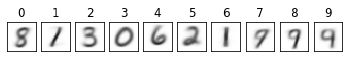

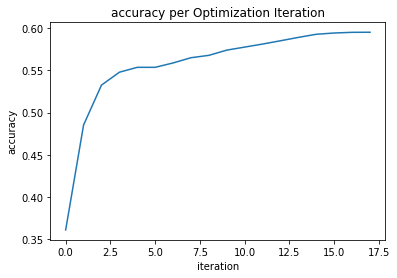

In [41]:
for i in range(k) : 
    
    label       = i
    im_vector   = centroid_vector[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))
    
    plt.subplot(1, k, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None', vmin = 0, vmax = 255)

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()

# plot Accuracy Graph
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy per Optimization Iteration')
plt.plot(accuracy_for_each_round)
plt.show()

### [3] K = 15
#### (1) Calculate Energy and Accuracy using 'mnist_train.csv' as training set

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import random

#
# File I/O
#
file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

#
# Variables Definition
#
size_row	= 28                # height of the image
size_col  	= 28                # width of the image
num_image	= len(data)         # number of images in the file
count   	= 0                 # count for the number of images
k = 15                           # number of cluster
maximum_round = 50              # maximum number of round for learning
threshold = 0.0001

num_iteration = 0               # Number of iterations executed
prev_energy = 0                 # variable for saving previous round's energy
current_energy = 0              # variable for saving current round's energy
energy_for_each_round = []      # energy for each round
accuracy_for_each_round = []    # accuracy for each round


#
# Function L2Distance(listX, listY) : L2 Norm distance between list x and y
#
def L2Distance(listX, listY):

    x = np.array(listX)
    y = np.array(listY)

    sqrSumList = (x - y) ** 2    # Square of (x-y) for each element in list x, y
    sqrSum = np.sum(sqrSumList)  # Get L2 distance using square sum list  
    result = np.sqrt(sqrSum)     # get the square of L2 distance using np.sqrt()
    return(result)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)
cluster_num = np.empty(num_image,dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    
    list_label[count]       = label
    list_image[:, count]    = im_vector 
    # Randomly labeling on each picture between 0 to k - 1
    cluster_num[count]     = random.randrange(0,k)

    count += 1

# If the iteration exceed maximum round, stop
for n in range(0, maximum_round) :
    
    print("<",n+1, "th round>")
    centroid_vector = np.zeros(((size_row * size_col),k), dtype=float)
    cv_count = np.zeros(k, dtype = int)
    
    # compute the sum of color and the number of images for each pixel 
    for i in range(0,num_image) :
        centroid_vector[:, int(cluster_num[i])] += list_image[:, i]
        cv_count[int(cluster_num[i])] += 1
    
    # update the next round's centroid using average value
    for i in range(0,k) :
        centroid_vector[:, i] /= cv_count[i]
    
    for i in range(0,num_image) :
        im_vector = list_image[:, i]
        L2Dist = np.zeros(k, dtype = float)
        
        for j in range(0, k) :
            L2Dist[j] = L2Distance(im_vector, centroid_vector[:,j])
        
        # label of the closest distance would be the label of i-th image
        modified_cluster_num = np.argmin(L2Dist)
        current_energy += L2Distance(im_vector, centroid_vector[:, modified_cluster_num]) ** 2
        cluster_num[i] = modified_cluster_num
    
    energy_for_each_round.append(current_energy)
    
    accuracy_matrix = np.zeros((k,10), dtype = int)
    list_mk = np.zeros(k)
    
    for i in range(0,num_image) :
        accuracy_matrix[int(cluster_num[i]),int(list_label[i])] += 1
    
    for i in range(0,k) :
        list_mk[i] = np.amax(accuracy_matrix[i])

    accuracy = np.sum(list_mk) / num_image
    accuracy_for_each_round.append(accuracy)

    print("# of elements in each cluster : ", cv_count)
    print("change rate : ", round(np.absolute(current_energy - prev_energy) / current_energy * 100, 3), "%")
    
    
    if np.absolute(current_energy - prev_energy) / current_energy < threshold :
        num_iteration = n
        break
        
    prev_energy = current_energy
    current_energy = 0
    num_iteration = n
    
print("# of iteration : ", num_iteration)
    


< 1 th round>
# of elements in each cluster :  [3974 4069 4010 4031 3976 3952 4002 3893 4145 3944 3900 3958 4157 4081
 3908]
change rate :  100.0 %
< 2 th round>
# of elements in each cluster :  [4940 1390 7410  442 9972  301 3488 5511 3819 1983 3042 6135 2163 4479
 4925]
change rate :  27.627 %
< 3 th round>
# of elements in each cluster :  [6034 2306 5202 2190 7467 1697 4061 3241 4103 3586 4711 3099 3598 4478
 4227]
change rate :  5.854 %
< 4 th round>
# of elements in each cluster :  [5995 2944 4466 2841 6403 2103 4095 3699 4054 4105 4610 2820 3608 4047
 4210]
change rate :  2.526 %
< 5 th round>
# of elements in each cluster :  [5604 3348 4206 3182 5517 2335 4270 4530 4005 4411 4438 2738 3412 3832
 4172]
change rate :  0.915 %
< 6 th round>
# of elements in each cluster :  [5311 3544 4334 3179 4921 2500 4402 4720 4033 4512 4476 2737 3490 3714
 4127]
change rate :  0.385 %
< 7 th round>
# of elements in each cluster :  [5129 3681 4449 3147 4512 2620 4490 4742 4083 4530 4627 2683 365

#### (1)_2 Plot the Energy Graph and Accuracy Graph

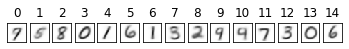

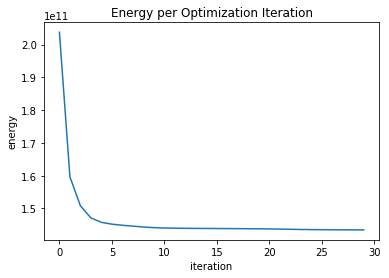

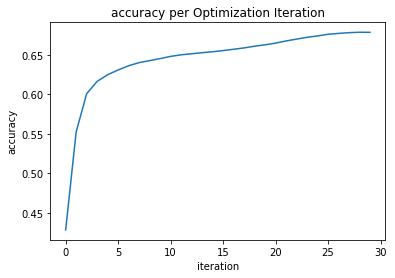

In [43]:
for i in range(k) : 
    
    label       = i
    im_vector   = centroid_vector[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))
    
    plt.subplot(1, k, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None', vmin = 0, vmax = 255)

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()

# plot Energy Graph
plt.xlabel('iteration')
plt.ylabel('energy')
plt.title('Energy per Optimization Iteration')
plt.plot(energy_for_each_round)
plt.show()

# plot Accuracy Graph
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy per Optimization Iteration')
plt.plot(accuracy_for_each_round)
plt.show()

#### (2) Calculate testing accuracy using centroid vectors calculated above using training set

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import random

#
# File I/O
#
file_data		= "mnist_test.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

#
# Variables Definition
#
size_row	= 28                # height of the image
size_col  	= 28                # width of the image
num_image	= len(data)         # number of images in the file
count   	= 0                 # count for the number of images
k = 15                           # number of cluster
maximum_round = 50              # maximum number of round for learning
threshold = 0.0001

num_iteration = 0               # Number of iterations executed
prev_energy = 0                 # variable for saving previous round's energy
current_energy = 0              # variable for saving current round's energy
energy_for_each_round = []      # energy for each round
accuracy_for_each_round = []    # accuracy for each round


#
# Function L2Distance(listX, listY) : L2 Norm distance between list x and y
#
def L2Distance(listX, listY):

    x = np.array(listX)
    y = np.array(listY)

    sqrSumList = (x - y) ** 2    # Square of (x-y) for each element in list x, y
    sqrSum = np.sum(sqrSumList)  # Get L2 distance using square sum list  
    result = np.sqrt(sqrSum)     # get the square of L2 distance using np.sqrt()
    return(result)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)
#cluster_num = np.empty(num_image,dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    
    list_label[count]       = label
    list_image[:, count]    = im_vector 
    # Randomly labeling on each picture between 0 to k - 1
    # cluster_num[count]     = random.randrange(0,k)

    count += 1

# If the iteration exceed maximum round, stop
for n in range(0, maximum_round) :
    
    print("<",n+1, "th round>")
    centroid_vector = np.zeros(((size_row * size_col),k), dtype=float)
    cv_count = np.zeros(k, dtype = int)
    
    # compute the sum of color and the number of images for each pixel 
    for i in range(0,num_image) :
        centroid_vector[:, int(cluster_num[i])] += list_image[:, i]
        cv_count[int(cluster_num[i])] += 1
    
    # update the next round's centroid using average value
    for i in range(0,k) :
        centroid_vector[:, i] /= cv_count[i]
    
    for i in range(0,num_image) :
        im_vector = list_image[:, i]
        L2Dist = np.zeros(k, dtype = float)
        
        for j in range(0, k) :
            L2Dist[j] = L2Distance(im_vector, centroid_vector[:,j])
        
        # label of the closest distance would be the label of i-th image
        modified_cluster_num = np.argmin(L2Dist)
        current_energy += L2Distance(im_vector, centroid_vector[:, modified_cluster_num]) ** 2
        cluster_num[i] = modified_cluster_num
    
    energy_for_each_round.append(current_energy)
    
    accuracy_matrix = np.zeros((k,10), dtype = int)
    list_mk = np.zeros(k)
    
    for i in range(0,num_image) :
        accuracy_matrix[int(cluster_num[i]),int(list_label[i])] += 1
    
    for i in range(0,k) :
        list_mk[i] = np.amax(accuracy_matrix[i])

    accuracy = np.sum(list_mk) / num_image
    accuracy_for_each_round.append(accuracy)

    print("# of elements in each cluster : ", cv_count)
    print("change rate : ", round(np.absolute(current_energy - prev_energy) / current_energy * 100, 3), "%")
    
    
    if np.absolute(current_energy - prev_energy) / current_energy < threshold :
        num_iteration = n
        break
        
    prev_energy = current_energy
    current_energy = 0
    num_iteration = n
    
print("# of iteration : ", num_iteration)
    


< 1 th round>
# of elements in each cluster :  [861 663 686 500 701 385 769 737 738 901 750 475 735 430 669]
change rate :  100.0 %
< 2 th round>
# of elements in each cluster :  [ 542  361  415  629  228 1019  506 1529  344  410  115 2345  151  637
  769]
change rate :  26.816 %
< 3 th round>
# of elements in each cluster :  [ 628  577  415  402  573  625  732 1017  630  524  222 1753  283  589
 1030]
change rate :  5.506 %
< 4 th round>
# of elements in each cluster :  [ 561  629  390  499  640  480  756  904  788  583  274 1480  485  582
  949]
change rate :  2.469 %
< 5 th round>
# of elements in each cluster :  [ 483  664  369  609  693  392  781  821  879  610  319 1239  689  567
  885]
change rate :  1.434 %
< 6 th round>
# of elements in each cluster :  [ 456  687  341  608  734  374  788  771  916  654  331 1146  785  555
  854]
change rate :  0.677 %
< 7 th round>
# of elements in each cluster :  [ 434  701  320  634  697  362  791  743  931  683  341 1131  832  555
  845]
ch

#### (2)_2 Plot Accuracy Graph for Training set

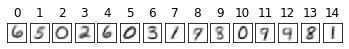

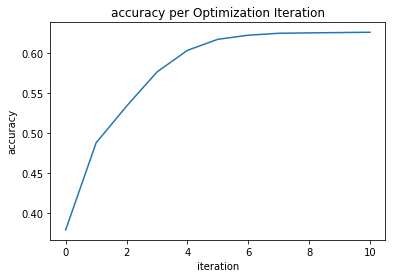

In [45]:
for i in range(k) : 
    
    label       = i
    im_vector   = centroid_vector[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))
    
    plt.subplot(1, k, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None', vmin = 0, vmax = 255)

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()

# plot Accuracy Graph
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy per Optimization Iteration')
plt.plot(accuracy_for_each_round)
plt.show()

### [4] K = 20
#### (1) Calculate Energy and Accuracy using 'mnist_train.csv' as training set

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import random

#
# File I/O
#
file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

#
# Variables Definition
#
size_row	= 28                # height of the image
size_col  	= 28                # width of the image
num_image	= len(data)         # number of images in the file
count   	= 0                 # count for the number of images
k = 20                           # number of cluster
maximum_round = 50              # maximum number of round for learning
threshold = 0.0001

num_iteration = 0               # Number of iterations executed
prev_energy = 0                 # variable for saving previous round's energy
current_energy = 0              # variable for saving current round's energy
energy_for_each_round = []      # energy for each round
accuracy_for_each_round = []    # accuracy for each round


#
# Function L2Distance(listX, listY) : L2 Norm distance between list x and y
#
def L2Distance(listX, listY):

    x = np.array(listX)
    y = np.array(listY)

    sqrSumList = (x - y) ** 2    # Square of (x-y) for each element in list x, y
    sqrSum = np.sum(sqrSumList)  # Get L2 distance using square sum list  
    result = np.sqrt(sqrSum)     # get the square of L2 distance using np.sqrt()
    return(result)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)
cluster_num = np.empty(num_image,dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    
    list_label[count]       = label
    list_image[:, count]    = im_vector 
    # Randomly labeling on each picture between 0 to k - 1
    cluster_num[count]     = random.randrange(0,k)

    count += 1

# If the iteration exceed maximum round, stop
for n in range(0, maximum_round) :
    
    print("<",n+1, "th round>")
    centroid_vector = np.zeros(((size_row * size_col),k), dtype=float)
    cv_count = np.zeros(k, dtype = int)
    
    # compute the sum of color and the number of images for each pixel 
    for i in range(0,num_image) :
        centroid_vector[:, int(cluster_num[i])] += list_image[:, i]
        cv_count[int(cluster_num[i])] += 1
    
    # update the next round's centroid using average value
    for i in range(0,k) :
        centroid_vector[:, i] /= cv_count[i]
    
    for i in range(0,num_image) :
        im_vector = list_image[:, i]
        L2Dist = np.zeros(k, dtype = float)
        
        for j in range(0, k) :
            L2Dist[j] = L2Distance(im_vector, centroid_vector[:,j])
        
        # label of the closest distance would be the label of i-th image
        modified_cluster_num = np.argmin(L2Dist)
        current_energy += L2Distance(im_vector, centroid_vector[:, modified_cluster_num]) ** 2
        cluster_num[i] = modified_cluster_num
    
    energy_for_each_round.append(current_energy)
    
    accuracy_matrix = np.zeros((k,10), dtype = int)
    list_mk = np.zeros(k)
    
    for i in range(0,num_image) :
        accuracy_matrix[int(cluster_num[i]),int(list_label[i])] += 1
    
    for i in range(0,k) :
        list_mk[i] = np.amax(accuracy_matrix[i])

    accuracy = np.sum(list_mk) / num_image
    accuracy_for_each_round.append(accuracy)

    print("# of elements in each cluster : ", cv_count)
    print("change rate : ", round(np.absolute(current_energy - prev_energy) / current_energy * 100, 3), "%")
    
    
    if np.absolute(current_energy - prev_energy) / current_energy < threshold :
        num_iteration = n
        break
        
    prev_energy = current_energy
    current_energy = 0
    num_iteration = n
    
print("# of iteration : ", num_iteration)
    


< 1 th round>
# of elements in each cluster :  [3037 3012 2996 3013 2969 3005 3034 2918 2980 2999 3009 2944 2984 2974
 3009 3054 3013 3040 2992 3018]
change rate :  100.0 %
< 2 th round>
# of elements in each cluster :  [4853 5148  982 1956 5410 2963  927  210 1042 5298 4651  807 3726 4356
 1700 3303 6044 1995 2586 2043]
change rate :  30.281 %
< 3 th round>
# of elements in each cluster :  [4128 4060 1730 2626 3249 2872 1759 2402 1991 1689 4468  895 3682 4636
 3341 3624 3365 2582 3801 3100]
change rate :  7.537 %
< 4 th round>
# of elements in each cluster :  [4041 3292 1867 2920 2725 2781 2579 3060 2131 2071 3646 1505 3160 4682
 3827 3404 3181 2696 3710 2722]
change rate :  2.328 %
< 5 th round>
# of elements in each cluster :  [3770 2996 1926 3205 2448 2615 3153 2946 2208 2690 3141 2170 2952 4455
 4202 3331 3167 2715 3409 2501]
change rate :  1.104 %
< 6 th round>
# of elements in each cluster :  [3562 2865 1890 3439 2527 2507 3487 2649 2307 2857 2936 2763 2821 4217
 4407 3266 3042 

#### (1)_2 Plot the Energy Graph and Accuracy Graph

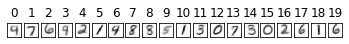

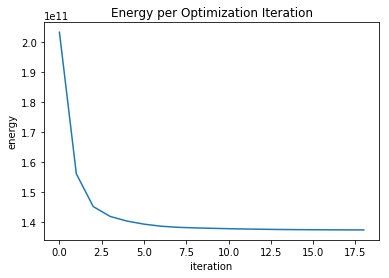

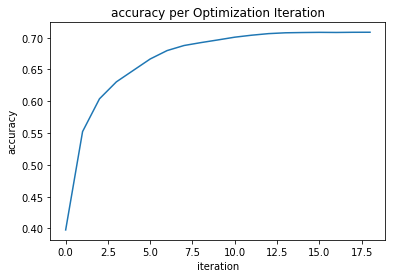

In [47]:
for i in range(k) : 
    
    label       = i
    im_vector   = centroid_vector[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))
    
    plt.subplot(1, k, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None', vmin = 0, vmax = 255)

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()

# plot Energy Graph
plt.xlabel('iteration')
plt.ylabel('energy')
plt.title('Energy per Optimization Iteration')
plt.plot(energy_for_each_round)
plt.show()

# plot Accuracy Graph
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy per Optimization Iteration')
plt.plot(accuracy_for_each_round)
plt.show()

#### (2) Calculate testing accuracy using centroid vectors calculated above using training set

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import random

#
# File I/O
#
file_data		= "mnist_test.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

#
# Variables Definition
#
size_row	= 28                # height of the image
size_col  	= 28                # width of the image
num_image	= len(data)         # number of images in the file
count   	= 0                 # count for the number of images
k = 20                           # number of cluster
maximum_round = 50              # maximum number of round for learning
threshold = 0.0001

num_iteration = 0               # Number of iterations executed
prev_energy = 0                 # variable for saving previous round's energy
current_energy = 0              # variable for saving current round's energy
energy_for_each_round = []      # energy for each round
accuracy_for_each_round = []    # accuracy for each round


#
# Function L2Distance(listX, listY) : L2 Norm distance between list x and y
#
def L2Distance(listX, listY):

    x = np.array(listX)
    y = np.array(listY)

    sqrSumList = (x - y) ** 2    # Square of (x-y) for each element in list x, y
    sqrSum = np.sum(sqrSumList)  # Get L2 distance using square sum list  
    result = np.sqrt(sqrSum)     # get the square of L2 distance using np.sqrt()
    return(result)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)
#cluster_num = np.empty(num_image,dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    
    list_label[count]       = label
    list_image[:, count]    = im_vector 
    # Randomly labeling on each picture between 0 to k - 1
    # cluster_num[count]     = random.randrange(0,k)

    count += 1

# If the iteration exceed maximum round, stop
for n in range(0, maximum_round) :
    
    print("<",n+1, "th round>")
    centroid_vector = np.zeros(((size_row * size_col),k), dtype=float)
    cv_count = np.zeros(k, dtype = int)
    
    # compute the sum of color and the number of images for each pixel 
    for i in range(0,num_image) :
        centroid_vector[:, int(cluster_num[i])] += list_image[:, i]
        cv_count[int(cluster_num[i])] += 1
    
    # update the next round's centroid using average value
    for i in range(0,k) :
        centroid_vector[:, i] /= cv_count[i]
    
    for i in range(0,num_image) :
        im_vector = list_image[:, i]
        L2Dist = np.zeros(k, dtype = float)
        
        for j in range(0, k) :
            L2Dist[j] = L2Distance(im_vector, centroid_vector[:,j])
        
        # label of the closest distance would be the label of i-th image
        modified_cluster_num = np.argmin(L2Dist)
        current_energy += L2Distance(im_vector, centroid_vector[:, modified_cluster_num]) ** 2
        cluster_num[i] = modified_cluster_num
    
    energy_for_each_round.append(current_energy)
    
    accuracy_matrix = np.zeros((k,10), dtype = int)
    list_mk = np.zeros(k)
    
    for i in range(0,num_image) :
        accuracy_matrix[int(cluster_num[i]),int(list_label[i])] += 1
    
    for i in range(0,k) :
        list_mk[i] = np.amax(accuracy_matrix[i])

    accuracy = np.sum(list_mk) / num_image
    accuracy_for_each_round.append(accuracy)

    print("# of elements in each cluster : ", cv_count)
    print("change rate : ", round(np.absolute(current_energy - prev_energy) / current_energy * 100, 3), "%")
    
    
    if np.absolute(current_energy - prev_energy) / current_energy < threshold :
        num_iteration = n
        break
        
    prev_energy = current_energy
    current_energy = 0
    num_iteration = n
    
print("# of iteration : ", num_iteration)
    


< 1 th round>
# of elements in each cluster :  [594 401 216 685 441 414 632 525 515 572 459 665 472 648 520 429 413 482
 480 437]
change rate :  100.0 %
< 2 th round>
# of elements in each cluster :  [  89 1719 1472  634  330  521  878  350  294  194  125   61  285  430
  163  286  579  490  608  492]
change rate :  29.136 %
< 3 th round>
# of elements in each cluster :  [ 210 1373 1218  687  544  577  604  321  316  403  270  251  246  377
  334  335  596  441  537  360]
change rate :  7.008 %
< 4 th round>
# of elements in each cluster :  [ 266 1173  961  615  498  570  372  286  349  426  516  476  483  374
  408  308  458  555  514  392]
change rate :  3.904 %
< 5 th round>
# of elements in each cluster :  [319 962 823 563 476 551 347 296 440 460 645 601 509 356 401 295 379 650
 511 416]
change rate :  1.109 %
< 6 th round>
# of elements in each cluster :  [371 874 731 547 472 534 364 299 506 477 644 659 510 342 400 291 354 704
 497 424]
change rate :  0.385 %
< 7 th round>
# of el

#### (2)_2 Plot Accuracy Graph for Training set

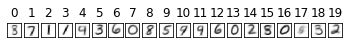

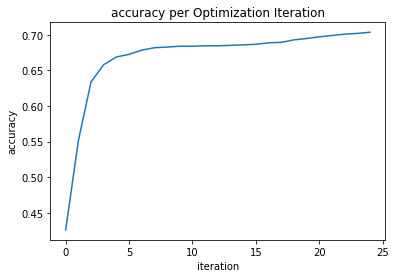

In [49]:
for i in range(k) : 
    
    label       = i
    im_vector   = centroid_vector[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))
    
    plt.subplot(1, k, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None', vmin = 0, vmax = 255)

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()

# plot Accuracy Graph
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy per Optimization Iteration')
plt.plot(accuracy_for_each_round)
plt.show()